<a href="https://colab.research.google.com/github/Chaitanya4/ExpertAIHackathon/blob/main/Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sentimental analysis of tweets related to US Election 2020 to find out people's sentiments regarding leaders DONALD TRUMP and JOE BIDEN.**

The dataset is taken from Kaggle. For more information about dataset visit:
https://www.kaggle.com/manchunhui/us-election-2020-tweets

In [1]:
!pip install expertai-nlapi


     |████████████████████████████████| 102kB 4.1MB/s 


**Importing the required packages**

In [2]:
import os
os.environ["EAI_USERNAME"] = 'chaitanyashah707@gmail.com'
os.environ["EAI_PASSWORD"] = 'Chaitanya@07'

In [36]:
#importing required packages
from expertai.nlapi.cloud.client import ExpertAiClient
client = ExpertAiClient()
language= 'en'

In [4]:
!pip install twython

In [30]:
#importing required packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import io
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.classify import NaiveBayesClassifier

In [6]:
#mouting google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Importing and reading the Donald Trump and Joe Biden dataset**

In [7]:
#reading donald trump dataset
pd.set_option("display.max_columns", None)
trump_dataset = pd.read_csv('/content/drive/My Drive/Dataset/hashtag_donaldtrump.csv', lineterminator='\n')
print(trump_dataset.head())

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   
3  2020-10-15 00:00:02  1.316529e+18   
4  2020-10-15 00:00:08  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   
3  2 hours since last tweet from #Trump! Maybe he...    0.0            0.0   
4  You get a tie! And you get a tie! #Trump ‘s ra...    4.0            3.0   

               source       user_id              user_name user_screen_name  \
0           TweetDeck  3.606665e+08     El Sol Latino News  elsollatinonews   
1    Social Mediaset   3.316176e+08                Tgcom24  MediasetTgcom24   
2     Twitter Web App  8.436472e+06                 s

In [8]:
#reading joe biden dataset
biden_dataset = pd.read_csv('/content/drive/My Drive/Dataset/hashtag_joebiden.csv', lineterminator='\n')
print(biden_dataset.head())

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:18  1.316529e+18   
2  2020-10-15 00:00:20  1.316529e+18   
3  2020-10-15 00:00:21  1.316529e+18   
4  2020-10-15 00:00:22  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...    0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...    0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...    1.0            0.0   

               source       user_id           user_name user_screen_name  \
0           TweetDeck  3.606665e+08  El Sol Latino News  elsollatinonews   
1    Twitter for iPad  8.099044e+08         Cheri A. 🇺🇸     Biloximeemaw   
2     Twitter Web App  3.494182e+09          Flag Waver      F

**Data Cleaning and Preprocessing**

In [9]:
#dropping unnecessary columns from both the data frames
trump_dataset = trump_dataset.drop(columns = ['tweet_id','collected_at','user_description','collected_at'])
biden_dataset = biden_dataset.drop(columns = ['tweet_id','collected_at','user_description','collected_at'])

In [10]:
#including a column candidat to denote candidate name in both the data frames
trump_dataset.loc[:,'condidat'] = 'Trump'
biden_dataset.loc[:,'condidat'] = 'Biden'

In [11]:
#merging the data of donald trump dataframe and joe biden dataframe
Data_Combined = pd.concat([trump_dataset,biden_dataset])
Data_Combined.sort_values(by='created_at')
Data_Combined.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,condidat
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,Trump
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump


**Total number of candidate tweets visualization**

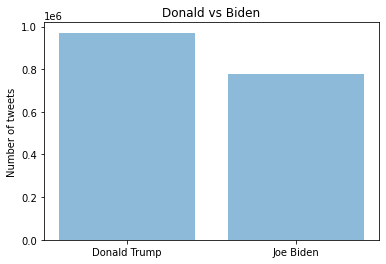

In [12]:
#finding the total number of tweets which have candidate Trump and which have candidate Biden
trump_tweets = Data_Combined.query('(condidat == "Trump")').tweet.sort_values(ascending=False).count()
biden_tweets = Data_Combined.query('(condidat == "Biden")').tweet.sort_values(ascending=False).count()

objects = ('Donald Trump','Joe Biden')
y_pos = np.arange(len(objects))
performance = [trump_tweets,biden_tweets]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of tweets')
plt.title('Donald vs Biden')

plt.show()

**Total number of likes visualization**

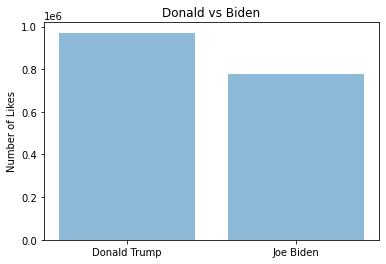

In [13]:
#finding the likes on tweets corresponding to data related to Trump and likes on tweets corresponding to data related to Biden
trump_tweets = Data_Combined.query('(condidat == "Trump")').likes.count()
biden_tweets = Data_Combined.query('(condidat == "Biden")').likes.count()

objects = ('Donald Trump','Joe Biden')
y_pos = np.arange(len(objects))
performance = [trump_tweets,biden_tweets]

plt.bar(y_pos, performance, align='center', alpha = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Likes')
plt.title('Donald vs Biden')

plt.show()

**Tweets visualization based on different countries**

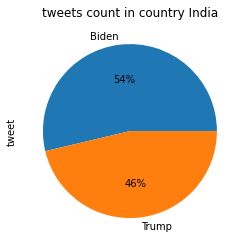

In [14]:
#function to count tweets based on countries
def Country_tweets(country,kind):
    Data=Data_Combined[Data_Combined.country == country].groupby('condidat').tweet.count()
    Data.plot(x = 'condidate',y = "tweet",kind = kind, title="tweets count in country " + str(country),autopct='%.0f%%')
#visualizing how many percentage of people in India are tweeting regarding Biden and how many are tweeting regarding Trump
Country_tweets('India','pie')

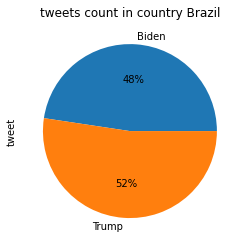

In [15]:
#visualizing how many percentage of people in Brazil are tweeting regarding Biden and how many are tweeting regarding Trump
Country_tweets('Brazil','pie')

In [16]:
#class for building chart of top 5 countries, top 10 states, top 5 continent based on total tweet count
class Chart_builder:
    
    def __init__(self,topic_index,number):
        super().__init__()
        self.topic_index = topic_index
        self.topics_list = ['country','state','continent']
        self.number      = number
        self.index = self.topics_list[self.topic_index]
        self.Trump_tweets_sources_x = Data_Combined.query('(condidat == "Trump")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number].index
        
        self.Trump_tweets_sources_y = Data_Combined.query('(condidat == "Trump")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number]
        
        self.Biden_tweets_sources_x = Data_Combined.query('(condidat == "Biden")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number].index
        self.Biden_tweets_sources_y = Data_Combined.query('(condidat == "Biden")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number]
    
    def Builder(self):
        fig = go.Figure([go.Bar(x = self.Trump_tweets_sources_x, y = self.Trump_tweets_sources_y, name = 'Trump'),
                         go.Bar(x = self.Biden_tweets_sources_x, y = self.Biden_tweets_sources_y, name = 'Biden')])
        # Customize aspect
        fig.update_layout(title_text = 'top '+ str(self.number) + ' ' + self.index)
        fig.update_xaxes(title = 'sources')
        fig.update_yaxes(title = 'tweets count')
        fig.show()

**Top 5 countries**

In [17]:
#visualizing top 5 countries based on total tweet count
# number of elements in chart
topic_index = 0 # from class list its country

# number of elements in chart
number = 5 # it;s mean top five

launch = Chart_builder(topic_index,number)
launch.Builder()

**Top 10 states**

In [18]:
#visualizing top 10 states based on total tweet count
# number of elements in chart
topic_index = 1 # from class list its states

# number of elements in chart
number = 10 # it;s mean top ten

launch = Chart_builder(topic_index,number)
launch.Builder()

**Top 5 continents**

In [19]:
#visualizing top 5 continents based on total tweet count
# number of elements in chart
topic_index = 2 # from class list its continent

# number of elements in chart
number = 5 # it;s mean top five

launch = Chart_builder(topic_index,number)
launch.Builder()

# **Sentimental Anaylsis**

**Data Manipulation**

In [31]:
#function to clean tweet text
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    return text

**Donald Trump Tweets Sentimental Analysis in country USA**

In [32]:
trump_tweets = Data_Combined.query('(condidat == "Trump")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country']]
trump_tweets = trump_tweets.dropna().loc[trump_tweets.country == 'United States of America'][:1000]

trump_tweets.reset_index(inplace = True, drop = True)

trump_tweets['ClearTweet'] = trump_tweets['tweet'].apply(clean)

**Expert.ai API usage for Sentimental Analysis**

In [33]:
#function to find sentiments of tweets using expert.ai API
def sentiment_overall(client, text, language):
    try:
        input_text = str(text)[0:10000]  # limit the input size
        document = client.specific_resource_analysis(
        body={"document": {"text": input_text}}, 
        params={'language':  language, 'resource': 'sentiment'
       })
        return document.sentiment.overall
    except Exception as e: 
        print(str(e) +": " + str(text))

In [34]:
print(trump_tweets.head())

                                               tweet  \
0  Without a doubt, the #FourSeasons debacle is t...   
1  President Donald #Trump’s youngest daughter, T...   
2  Woah. Have you read this article?\n\nAll the p...   
3  The latest episode of #SNL tackled #DonaldTrum...   
4  🇺🇸 #Decision2020: @JoeBiden firmará una serie ...   

                    country                                         ClearTweet  
0  United States of America  without a doubt  the fourseasons debacle is th...  
1  United States of America  president donald trump s youngest daughter  ti...  
2  United States of America  woah  have you read this article all the presi...  
3  United States of America  the latest episode of snl tackled donaldtrump ...  
4  United States of America        firmará una serie de órdenes ejecutivas ...  


In [37]:
#storing sentimental analysis result in overall_sentiment column
trump_tweets['overall_sentiment'] = trump_tweets['ClearTweet'].apply(lambda ClearTweet: sentiment_overall(client, ClearTweet, language))


In [38]:
print(trump_tweets.head())

                                               tweet  \
0  Without a doubt, the #FourSeasons debacle is t...   
1  President Donald #Trump’s youngest daughter, T...   
2  Woah. Have you read this article?\n\nAll the p...   
3  The latest episode of #SNL tackled #DonaldTrum...   
4  🇺🇸 #Decision2020: @JoeBiden firmará una serie ...   

                    country  \
0  United States of America   
1  United States of America   
2  United States of America   
3  United States of America   
4  United States of America   

                                          ClearTweet  overall_sentiment  
0  without a doubt  the fourseasons debacle is th...              -4.40  
1  president donald trump s youngest daughter  ti...               9.19  
2  woah  have you read this article all the presi...               0.00  
3  the latest episode of snl tackled donaldtrump ...               3.00  
4        firmará una serie de órdenes ejecutivas ...               2.70  


In [39]:
#finding positive, negative or neutral sentiments based on sentimental analysis score results
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

In [40]:
#storing sentiments in analysis column
trump_tweets['analysis']    = trump_tweets['overall_sentiment'].apply(getAnalysis)
trump_tweets.head()

,tweet,country,ClearTweet,overall_sentiment,analysis
0,"Without a doubt, the #FourSeasons debacle is t...",United States of America,without a doubt the fourseasons debacle is th...,-4.40,negative
1,"President Donald #Trump’s youngest daughter, T...",United States of America,president donald trump s youngest daughter ti...,9.19,positive
2,Woah. Have you read this article?\n\nAll the p...,United States of America,woah have you read this article all the presi...,0.00,neutral
3,The latest episode of #SNL tackled #DonaldTrum...,United States of America,the latest episode of snl tackled donaldtrump ...,3.00,positive
4,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,United States of America,firmará una serie de órdenes ejecutivas ...,2.70,positive


In [41]:
#generating funnel to visualize positive, negative and neutral sentiments based on API results
general  = trump_tweets.groupby('analysis').analysis.count()
neutral  = trump_tweets[trump_tweets['analysis'] == 'neutral'].ClearTweet.count()
positive = trump_tweets[trump_tweets['analysis'] == 'positive'].ClearTweet.count()
negative = trump_tweets[trump_tweets['analysis'] == 'negative'].ClearTweet.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["positivity","negativity","neutrality"], values = [positive,negative,neutral])])
fig.update_layout(title_text ='sentimental analysis of tweets Donald Trump')
fig.show()

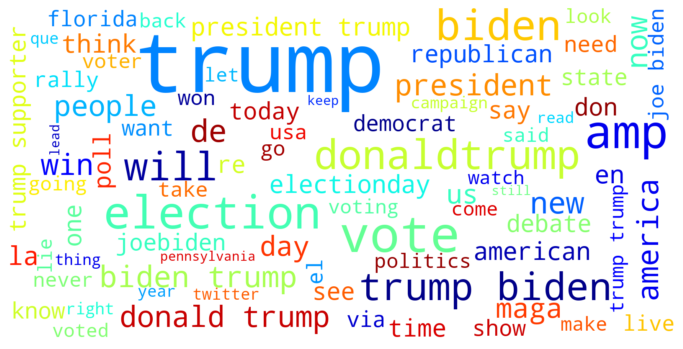

In [42]:
#generating word cloud to visualize words used in context with Donald Trump
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(trump_tweets['ClearTweet'][0:1000])

**Joe Biden Tweets Sentimental Analysis in country USA**

In [43]:
biden_tweets = Data_Combined.query('(condidat == "Biden")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country']]
biden_tweets = biden_tweets.dropna().loc[biden_tweets.country == 'United States of America'][:1000]

biden_tweets.reset_index(inplace = True, drop = True)

biden_tweets['ClearTweet'] = biden_tweets['tweet'].apply(clean)

In [44]:
print(biden_tweets.head())

                                               tweet  \
0  #JoeBiden is enlisting A-list star power to he...   
1  While we were campaigning across battleground ...   
2  The big fight TODAY!!!!! @realDonaldTrump vs #...   
3  During his victory speech, #JoeBiden said he u...   
4  Los nueve minutos de colorida celebración tras...   

                    country                                         ClearTweet  
0  United States of America  joebiden is enlisting a list star power to hel...  
1  United States of America  while we were campaigning across battleground ...  
2  United States of America  the big fight today       vs joebiden who you ...  
3  United States of America  during his victory speech  joebiden said he un...  
4  United States of America  los nueve minutos de colorida celebración tras...  


In [45]:
#storing sentimental analysis result in overall_sentiment column
biden_tweets['overall_sentiment'] = biden_tweets['ClearTweet'].apply(lambda ClearTweet: sentiment_overall(client, ClearTweet, language))

In [46]:
print(biden_tweets.head())

                                               tweet  \
0  #JoeBiden is enlisting A-list star power to he...   
1  While we were campaigning across battleground ...   
2  The big fight TODAY!!!!! @realDonaldTrump vs #...   
3  During his victory speech, #JoeBiden said he u...   
4  Los nueve minutos de colorida celebración tras...   

                    country  \
0  United States of America   
1  United States of America   
2  United States of America   
3  United States of America   
4  United States of America   

                                          ClearTweet  overall_sentiment  
0  joebiden is enlisting a list star power to hel...              14.69  
1  while we were campaigning across battleground ...               1.50  
2  the big fight today       vs joebiden who you ...             -21.39  
3  during his victory speech  joebiden said he un...              17.60  
4  los nueve minutos de colorida celebración tras...               0.00  


In [47]:
#storing sentiments in analysis column
biden_tweets['analysis']    = biden_tweets['overall_sentiment'].apply(getAnalysis)
biden_tweets.head()

,tweet,country,ClearTweet,overall_sentiment,analysis
0,#JoeBiden is enlisting A-list star power to he...,United States of America,joebiden is enlisting a list star power to hel...,14.69,positive
1,While we were campaigning across battleground ...,United States of America,while we were campaigning across battleground ...,1.50,positive
2,The big fight TODAY!!!!! @realDonaldTrump vs #...,United States of America,the big fight today vs joebiden who you ...,-21.39,negative
3,"During his victory speech, #JoeBiden said he u...",United States of America,during his victory speech joebiden said he un...,17.60,positive
4,Los nueve minutos de colorida celebración tras...,United States of America,los nueve minutos de colorida celebración tras...,0.00,neutral


In [48]:
#generating funnel to visualize positive, negative and neutral sentiments based on API results
general  = biden_tweets.groupby('analysis').analysis.count()
neutral  = biden_tweets[biden_tweets['analysis'] == 'neutral'].ClearTweet.count()
positive = biden_tweets[biden_tweets['analysis'] == 'positive'].ClearTweet.count()
negative = biden_tweets[biden_tweets['analysis'] == 'negative'].ClearTweet.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["positivity","negativity","neutrality"], values = [positive,negative,neutral])])
fig.update_layout(title_text ='sentimental analysis of tweets Joe Biden')
fig.show()

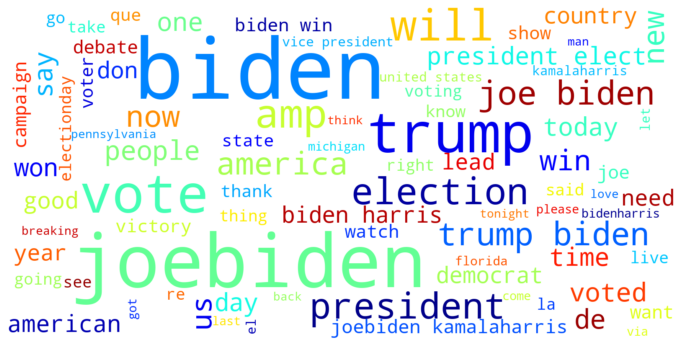

In [49]:
#generating word cloud to visualize words used in context with Joe Biden
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(biden_tweets['ClearTweet'][0:1000])